In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Activation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.decomposition import PCA

In [2]:
path = "F:\JupyterNotebook_Dir\REAM _Lab\EIA_RNN\Region_CAL.xlsx"
df = pd.read_excel(path)       #read data

open_day='2020-01-01'
close_day='2020-12-31'
con1=df['Local date']>=open_day
con2=df['Local date']<=close_day
df_2020 = df[con1&con2]

In [3]:
data_TI = df_2020["TI"].values;
data_COL = df_2020["NG: COL"].values      #access columns
data_NG = df_2020["NG: NG"].values;
data_NUC = df_2020["NG: NUC"].values;
data_OIL = df_2020["NG: OIL"].values
data_WAT = df_2020["NG: WAT"].values
data_SUN = df_2020["NG: SUN"].values;
data_WND = df_2020["NG: WND"].values;
data_OTH = df_2020["NG: OTH"].values
data_Trade = df_2020["Sum (Trade)"].values


data_D = df_2020["D"].values

data=np.vstack((data_TI,data_COL,data_NG,data_NUC,data_OIL,data_WAT,data_SUN,data_WND,data_OTH,data_Trade)).T

In [4]:
def rnn_model(seq_length, input_dim):
    model = Sequential()
#     model.add(tf.keras.layers.LSTM(128, input_shape= (seq_length, input_dim), return_sequences=False))
    model.add((SimpleRNN(128, input_shape=(seq_length, input_dim))))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
    model.add(Dropout(0.2))
    
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dense(1))
    return model

In [5]:
scaler_input = MinMaxScaler()
scaler_output = MinMaxScaler()

datas_scaled = scaler_input.fit_transform(data)
features = datas_scaled

target = data_D
target = target.reshape(-1,1)
target = scaler_output.fit_transform(target)



x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=123, shuffle=False)
x_train.shape
win_length = 10
batch_size = 2000
num_features = 10
train_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [6]:
model = rnn_model(seq_length = win_length, input_dim = num_features)
model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history = model.fit_generator(train_generator, epochs=100, validation_data=test_generator, shuffle=False)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
4/4 [==============================] - 1s 130ms/step - loss: 0.1214 - mean_absolute_error: 0.2748 - val_loss: 0.0107 - val_mean_absolute_error: 0.0841
Epoch 2/100
4/4 [==============================] - 0s 35ms/step - loss: 0.0406 - mean_absolute_error: 0.1573 - val_loss: 0.0424 - val_mean_absolute_error: 0.1864
Epoch 3/100
4/4 [==============================] - 0s 36ms/step - loss: 0.0463 - mean_absolute_error: 0.1739 - val_loss: 0.0082 - val_mean_absolute_error: 0.0714
Epoch 4/100
4/4 [==============================] - 0s 37ms/step - loss: 0.0291 - mean_absolute_error: 0.1318 - val_loss: 0.0233 - val_mean_absolute_error: 0.1328
Epoch 5/100
4/4 [==============================] - 0s 36ms/step - loss: 0.0256 - mean_absolute_error: 0.1267 - val_loss: 0.0208 - val_mean_absolute_error: 0.1240
Epoch 6/100
4/4 [==============================] - 0s 35ms/step - loss: 0.0232 - mean_absolute_error: 0.1187 - va

Epoch 50/100
4/4 [==============================] - 0s 48ms/step - loss: 0.0036 - mean_absolute_error: 0.0470 - val_loss: 0.0014 - val_mean_absolute_error: 0.0300
Epoch 51/100
4/4 [==============================] - 0s 59ms/step - loss: 0.0033 - mean_absolute_error: 0.0448 - val_loss: 0.0014 - val_mean_absolute_error: 0.0298
Epoch 52/100
4/4 [==============================] - 0s 48ms/step - loss: 0.0036 - mean_absolute_error: 0.0469 - val_loss: 0.0024 - val_mean_absolute_error: 0.0409
Epoch 53/100
4/4 [==============================] - 0s 45ms/step - loss: 0.0040 - mean_absolute_error: 0.0498 - val_loss: 0.0017 - val_mean_absolute_error: 0.0329
Epoch 54/100
4/4 [==============================] - 0s 51ms/step - loss: 0.0034 - mean_absolute_error: 0.0457 - val_loss: 0.0013 - val_mean_absolute_error: 0.0284
Epoch 55/100
4/4 [==============================] - 0s 49ms/step - loss: 0.0032 - mean_absolute_error: 0.0442 - val_loss: 0.0018 - val_mean_absolute_error: 0.0341
Epoch 56/100
4/4 [====

Epoch 100/100
4/4 [==============================] - 0s 37ms/step - loss: 0.0022 - mean_absolute_error: 0.0360 - val_loss: 0.0016 - val_mean_absolute_error: 0.0326


In [7]:
# model.evaluate_generator(test_generator, verbose=0)
predictions = model.predict_generator(test_generator)
predictions.shape[0]
# rev_trans = scaler_input.inverse_transform(datas_pred)
rev_trans = scaler_output.inverse_transform(predictions)

Instructions for updating:
Please use Model.predict, which supports generators.


In [8]:
print(rev_trans.shape)
print(rev_trans[:,-1])

(1747, 1)
[27971.188 29561.377 30545.514 ... 31056.273 29741.12  27546.951]


<ipython-input-9-6d0af38a9cd4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas_final['Predicted Demand'] = rev_trans[:,-1]


<AxesSubplot:>

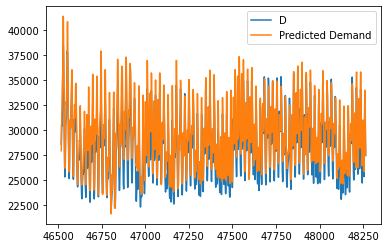

In [9]:
datas_final = df_2020[predictions.shape[0]*-1:]
datas_final.count()
datas_final['Predicted Demand'] = rev_trans[:,-1]
datas_final[['D','Predicted Demand']].plot()

Text(0.5, 1.0, 'Loss')

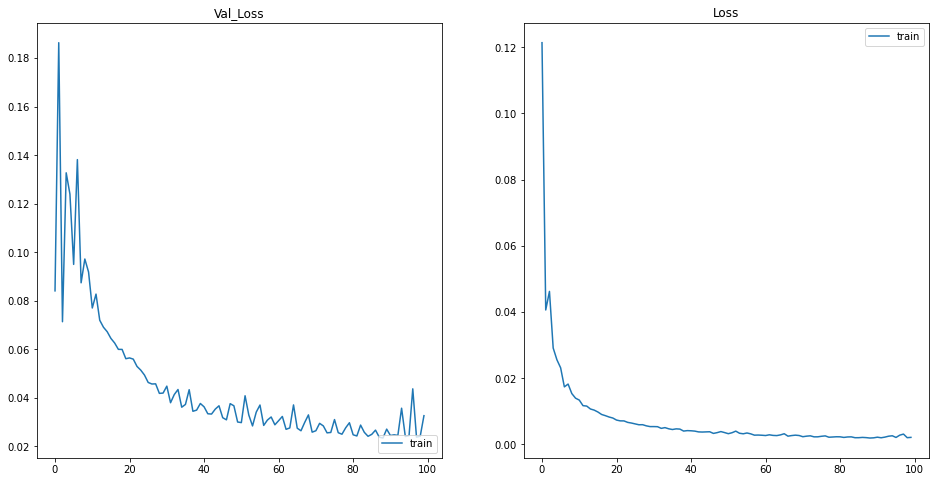

In [10]:
epoch = len(history.history['val_mean_absolute_error'])
epoch = np.arange(epoch)

plt.figure(figsize=(16,8))
#Plot accuracy vs epoch
plt.subplot(1,2,1)
# plt.plot(epoch,history.history['accuracy'])
plt.plot(epoch,history.history['val_mean_absolute_error'])
plt.title('Val_Loss')

plt.legend(labels=['train', 'val'],  loc='lower right')
#### Fill in plot ####

#Plot loss vs epoch
plt.subplot(1,2,2)
plt.plot(epoch,history.history['loss'])
# plt.plot(epoch,history.history['val_loss'])
plt.legend(labels=['train', 'val'],  loc='upper right')
plt.title('Loss')
#### Fill in plot ####

# FGSM attack

In [12]:
data_test = test_generator[0][0]
data_test = tf.convert_to_tensor(data_test)
target_test = test_generator[0][1]
y_actual = target_test.reshape(-1,1)
y_actual = tf.convert_to_tensor(y_actual)

print(data_test.shape)
print(y_actual.shape)
print(type(data_test))
print(type(y_actual))

(1747, 10, 10)
(1747, 1)
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [13]:
# import tensorflow.compat.v1 as tf
# tf.compat.v1.disable_eager_execution()

with tf.GradientTape() as tape:
    data_test = tf.cast(data_test,dtype='float64')
    tape.watch(data_test)
    yy = model(data_test)
    
    yy = tf.cast(yy,dtype='float64')
    loss = tf.square(yy - y_actual)
#     loss = loss.astype('float32')
grad = tape.gradient(loss, data_test)

sign_grad = tf.sign(grad)

In [14]:
levels = [0, 0.01,0.05,0.1,0.3]

MAPE_FGSM = []
r2Score_FGSM = []

for level in levels:
    x_adv = data_test + level*sign_grad
    y_adv = model(x_adv)
#     print(y_adv.shape)
    y_adv = scaler_output.inverse_transform(y_adv)

    epsilon = mean_absolute_percentage_error(datas_final[['D']].values,y_adv)
    score_FGSM = r2_score(datas_final[['D']].values,y_adv)
    MAPE_FGSM.append(epsilon)
    r2Score_FGSM.append(MAPE_FGSM)
    
    


# PCA defense against FGSM attack

In [15]:
# generating PCA data
def generating_PCAdata(x,n):
    pca = PCA(n_components=n)
    x_pca = pca.fit_transform(x)
    return x_pca


def reorganize(x,n):
    n0 =x.shape[0]
    n1 =x.shape[1]
    n2 =x.shape[2]
    
    x_re = np.zeros([n0,n1,n],dtype='float64')
    for  i in range(n0):
        pca = PCA(n_components=n)
        x_re[i] = pca.fit_transform(x[i])
    
    return x_re 

In [16]:
n_PCA = 8 #number of PCA features


datas_pca = generating_PCAdata(datas_scaled,n_PCA)
features_pca = datas_pca



x_train, x_test, y_train, y_test = train_test_split(features_pca, target, test_size=0.2, random_state=123, shuffle=False)

win_length = 10
batch_size = 2000
# num_features = n_PCA
train_generator_pca = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator_pca = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7027, 8)
(7027, 1)
(1757, 8)
(1757, 1)


In [18]:
model_pca = rnn_model(seq_length = win_length, input_dim = n_PCA)
model_pca.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history_pca = model_pca.fit_generator(train_generator_pca, epochs=100, validation_data=test_generator_pca, shuffle=False)

Epoch 1/100
4/4 [==============================] - 0s 99ms/step - loss: 0.1702 - mean_absolute_error: 0.3416 - val_loss: 0.1417 - val_mean_absolute_error: 0.3476
Epoch 2/100
4/4 [==============================] - 0s 38ms/step - loss: 0.0409 - mean_absolute_error: 0.1540 - val_loss: 0.0336 - val_mean_absolute_error: 0.1529
Epoch 3/100
4/4 [==============================] - 0s 52ms/step - loss: 0.0309 - mean_absolute_error: 0.1397 - val_loss: 0.0154 - val_mean_absolute_error: 0.0982
Epoch 4/100
4/4 [==============================] - 0s 50ms/step - loss: 0.0220 - mean_absolute_error: 0.1181 - val_loss: 0.0098 - val_mean_absolute_error: 0.0779
Epoch 5/100
4/4 [==============================] - 0s 42ms/step - loss: 0.0199 - mean_absolute_error: 0.1128 - val_loss: 0.0083 - val_mean_absolute_error: 0.0737
Epoch 6/100
4/4 [==============================] - 0s 50ms/step - loss: 0.0167 - mean_absolute_error: 0.1025 - val_loss: 0.0091 - val_mean_absolute_error: 0.0803
Epoch 7/100
4/4 [===========

In [19]:

predictions_pca = model_pca.predict_generator(test_generator_pca)
predictions_pca.shape[0]
rev_trans_pca = scaler_output.inverse_transform(predictions_pca)

<ipython-input-20-107bfaac419e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas_final['Predicted Demand (PCA)'] = rev_trans_pca[:,-1]


<AxesSubplot:>

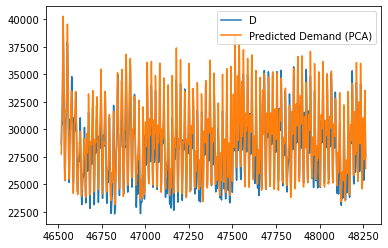

In [20]:
# datas_final = df_2020[predictions.shape[0]*-1:]
datas_final.count()
datas_final['Predicted Demand (PCA)'] = rev_trans_pca[:,-1]
datas_final[['D','Predicted Demand (PCA)']].plot()

In [21]:
MAPE_pca_FGSM = []
r2Score_PCA = []

for level in levels:
    x_adv = data_test + level*sign_grad
    x_re = reorganize(x_adv,n_PCA)

    y_adv = model_pca(x_re)
    y_adv = scaler_output.inverse_transform(y_adv)

    epsilon_pca = mean_absolute_percentage_error(datas_final[['D']].values,y_adv)
    score_PCA = r2_score(datas_final[['D']].values,y_adv)
    MAPE_pca_FGSM.append(epsilon_pca)
    r2Score_PCA.append(score_PCA)

Text(0.5, 1.0, 'Fast Gradient Sign Method')

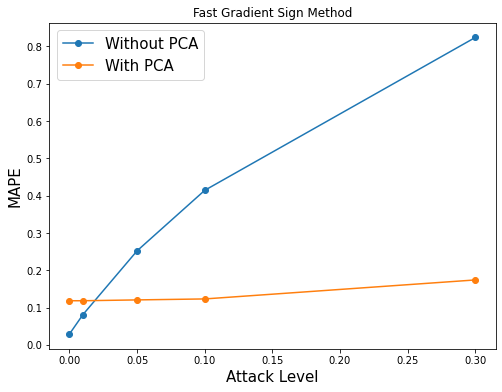

In [22]:
plt.figure(figsize=(8,6))
plt.plot(levels, MAPE_FGSM, label="Without PCA",marker='o');
plt.plot(levels, MAPE_pca_FGSM, label="With PCA",marker='o');
# plt.plot(levels, r2Score_FGSM, label="Without PCA",marker='o');
# plt.plot(levels, r2Score_PCA, label="With PCA",marker='o');
plt.xlabel("Attack Level",fontsize=15);
plt.ylabel("MAPE",fontsize=15);
plt.legend(prop={'size': 15})
plt.title("Fast Gradient Sign Method")

# Autoencoder defense against FGSM attack

In [23]:
class ae_model(keras.Model):
    
    def __init__(self):
        super(ae_model, self).__init__()  
        
        self.encoder = Sequential([
            Dense(16),
            Activation('relu'),
            Dense(32),
            Activation('relu'),
            Dense(64),
            Activation('relu'),
            Dense(8),
            Activation('relu'),

        ])

        # Decoders解码，网络
        self.decoder = Sequential([
            Dense(64),
            Activation('relu'),
            Dense(32),
            Activation('relu'),
            Dense(16),
            Activation('relu'),
            Dense(10),
            Activation('relu'),

        ])

    # 2. 前向传播的过程
    def call(self, inputs, training=None):
        h = self.encoder(inputs)
        x_hat = self.decoder(h)

        return x_hat


model_ae = ae_model()
model_ae.build(input_shape=(None, 10))     
model_ae.summary()


Model: "ae_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 8)                 3352      
_________________________________________________________________
sequential_3 (Sequential)    (None, 10)                3354      
Total params: 6,706
Trainable params: 6,706
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_ae.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history_ae = model_ae.fit(datas_scaled, datas_scaled , epochs = 20)

Epoch 1/20
275/275 [==============================] - 0s 1ms/step - loss: 0.0569 - mean_absolute_error: 0.1794
Epoch 2/20
275/275 [==============================] - 0s 871us/step - loss: 0.0119 - mean_absolute_error: 0.0811
Epoch 3/20
275/275 [==============================] - 0s 1ms/step - loss: 0.0050 - mean_absolute_error: 0.0530
Epoch 4/20
275/275 [==============================] - 0s 890us/step - loss: 0.0032 - mean_absolute_error: 0.0413
Epoch 5/20
275/275 [==============================] - 0s 813us/step - loss: 0.0023 - mean_absolute_error: 0.0333
Epoch 6/20
275/275 [==============================] - 0s 926us/step - loss: 0.0021 - mean_absolute_error: 0.0312
Epoch 7/20
275/275 [==============================] - 0s 882us/step - loss: 0.0020 - mean_absolute_error: 0.0300
Epoch 8/20
275/275 [==============================] - 0s 798us/step - loss: 0.0019 - mean_absolute_error: 0.0286
Epoch 9/20
275/275 [==============================] - 0s 928us/step - loss: 0.0018 - mean_absolute_e

In [25]:
MAPE_ae_FGSM = []
r2Score_ae = []

for level in levels:
    x_adv = data_test + level*sign_grad
    x_adv_reshape = tf.reshape(x_adv,[x_adv.shape[0]*x_adv.shape[1],x_adv.shape[2]])
    x_adv = model_ae.predict(x_adv_reshape)
    x_adv = tf.reshape(x_adv,[int(x_adv.shape[0]/win_length),win_length,x_adv.shape[1]])
    y_adv = model(x_adv)

    y_adv = scaler_output.inverse_transform(y_adv)

    epsilon_ae = mean_absolute_percentage_error(datas_final[['D']].values,y_adv)
    score_ae= r2_score(datas_final[['D']].values,y_adv)
    MAPE_ae_FGSM.append(epsilon_ae)
    r2Score_ae.append(score_ae)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [26]:
y_adv.shape

(1747, 1)

Text(0.5, 1.0, 'Fast Gradient Sign Method')

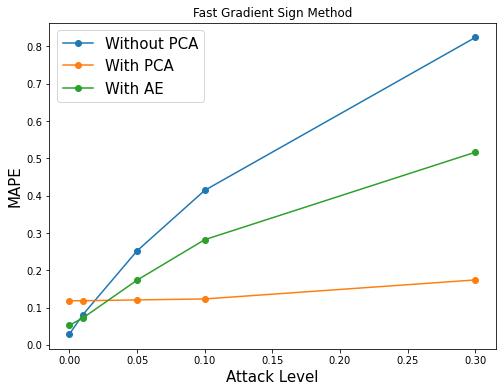

In [27]:
plt.figure(figsize=(8,6))
plt.plot(levels, MAPE_FGSM, label="Without PCA",marker='o');
plt.plot(levels, MAPE_pca_FGSM, label="With PCA",marker='o');
plt.plot(levels, MAPE_ae_FGSM, label="With AE",marker='o');
# plt.plot(levels, r2Score_PCA, label="With PCA",marker='o');
plt.xlabel("Attack Level",fontsize=15);
plt.ylabel("MAPE",fontsize=15);
plt.legend(prop={'size': 15})
plt.title("Fast Gradient Sign Method")

#  GAN defense

In [28]:
class generator(keras.Model):
    
    def __init__(self):
        super(generator, self).__init__()  
        
        self.generator = Sequential([
            Dense(10),
            Activation('relu'),
            Dense(20),
            Activation('relu'),
            Dense(10),
            Activation('relu'),
            Dense(10),
#             Activation('relu'),

        ])

    def call(self, inputs, training=None):
        x = self.generator(inputs)
        return x
dim_noise = 8
G = generator()
G.build(input_shape=(None, dim_noise))     
G.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 10)                630       
Total params: 630
Trainable params: 630
Non-trainable params: 0
_________________________________________________________________


In [29]:
class discriminator(keras.Model):
    def __init__(self):
        super(discriminator, self).__init__()  
        
        self.discriminator = Sequential([
            Dense(10),
            Activation('relu'),
            Dense(20),
            Activation('relu'),
            Dense(10),
            Activation('relu'),
            Dense(1),
            Activation('sigmoid'),

        ])

    def call(self, inputs, training=None):
        x = self.discriminator(inputs)
        return x
    
D = discriminator()
D.build(input_shape=(None, 10))     
D.summary()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 1)                 551       
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


In [30]:
cross_entropy = keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_out, fake_out):
    real_loss = cross_entropy(tf.ones_like(real_out), real_out)
    fake_loss = cross_entropy(tf.zeros_like(fake_out), fake_out)
    return real_loss + fake_loss

def generator_loss(fake_out):
    return cross_entropy(tf.ones_like(fake_out), fake_out)

#define the optimzers
generator_opt = keras.optimizers.Adam(1e-2)
discriminator_opt = keras.optimizers.Adam(1e-2)

In [31]:
BATCH_SIZE = datas_scaled.shape[0]

list_genLoss = []
list_disLoss = []


def train_step(data):
    noise = tf.random.normal([BATCH_SIZE, dim_noise])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        real_out = D(data, training=True)
    
        gen_samples = G(noise, training=True)
        fake_out = D(gen_samples, training=True)
        
        gen_loss = generator_loss(fake_out)
#         print('gen_loss',gen_loss)
        list_genLoss.append(gen_loss)
        disc_loss = discriminator_loss(real_out, fake_out)
        list_disLoss.append(disc_loss)
        print('disc_loss',disc_loss)
        
    gradient_gen = gen_tape.gradient(gen_loss, G.trainable_variables)
    gradient_disc = disc_tape.gradient(disc_loss, D.trainable_variables)
    generator_opt.apply_gradients(zip(gradient_gen, G.trainable_variables))
    discriminator_opt.apply_gradients(zip(gradient_disc, D.trainable_variables))


In [32]:
# GAN training
EPOCHS = 200  

def train(dataset, epochs):
    for epoch in range(epochs):
        train_step(dataset)
#         print('.', end='')
        
# train(datas_scaled, EPOCHS)


train(data, EPOCHS)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

disc_loss tf.Tensor(1.6712778, shape=(), dtype=float32)
disc_loss tf.Tensor(1.6618686, shape=(), dtype=float32)
disc_loss tf.Tensor(1.653434, shape=(), dtype=float32)
disc_loss tf.Tensor(1.6430441, shape=(), dtype=float32)
disc_loss tf.Tensor(1.6315095, shape=(), dtype=float32)
disc_loss tf.Tensor(1.6200025, shape=(), dtype=float32)
disc_loss tf.Tensor(1.6092143, shape=(), dtype=float32)
disc_loss tf.Tensor(1.5981991, shape=(), dtype=float32)
disc_loss tf.Tensor(1.58601, shape=(), dtype=float32)
disc_lo

disc_loss tf.Tensor(1.3862922, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3862922, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3862922, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3862922, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3862922, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3862922, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3862922, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3862922, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3862922, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3862922, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3862922, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3862922, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3862922, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3862922, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3862922, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3862922, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3862922, shape=(), dtype=float32)
disc_loss tf.Tensor(1.3862922, shape=(), dtype=f

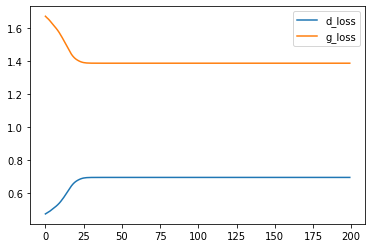

In [33]:
plt.plot(range(EPOCHS),list_genLoss,label = 'd_loss')
plt.plot(range(EPOCHS),list_disLoss,label = 'g_loss')
plt.legend()

In [34]:
####### GAN-based denosing######
MAPE_GAN_FGSM = []
r2Score_GAN = []
num_iter = 500
lr_z = 1e-2


for level in levels:
    x_adv = data_test + level*sign_grad
    x_adv_re = tf.reshape(x_adv , [x_adv.shape[0]*x_adv.shape[1], x_adv.shape[2]])
    z = tf.random.normal([x_adv.shape[0]*x_adv.shape[1], dim_noise])
    for i in range(num_iter):
        with tf.GradientTape() as g:
            g.watch(z)
            x_gen = G(z)

            x_gen = tf.cast(x_gen,dtype=tf.float64)
            loss = tf.square(x_adv_re - x_gen)
            gradient_adv = g.gradient(loss, z)
            z = z - lr_z*gradient_adv
#             print(gradient_adv.shape)
    x_gen = G(z)
   
    x_gen = tf.reshape(x_gen,[int(x_gen.shape[0]/win_length),win_length,x_gen.shape[1]])
    y_adv = model(x_gen)
    
    y_adv = scaler_output.inverse_transform(y_adv)
    
    epsilon_GAN = mean_absolute_percentage_error(datas_final[['D']].values,y_adv)
    score_GAN= r2_score(datas_final[['D']].values,y_adv)
    MAPE_GAN_FGSM.append(epsilon_GAN)
    r2Score_GAN.append(score_GAN)
    
    
    

print(MAPE_GAN_FGSM)

[0.3650040548925881, 0.3644439840050197, 0.3666034498181629, 0.3664551411262409, 0.36572402772296975]


In [35]:
print(y_adv)

[[39461.11142033]
 [38329.75831085]
 [38001.75569648]
 ...
 [37176.39831239]
 [39413.29930031]
 [39849.53047717]]


In [36]:
print(datas_final[['D']].values)

[[28610.]
 [30009.]
 [30575.]
 ...
 [29934.]
 [28669.]
 [27497.]]


Text(0.5, 1.0, 'Fast Gradient Sign Method')

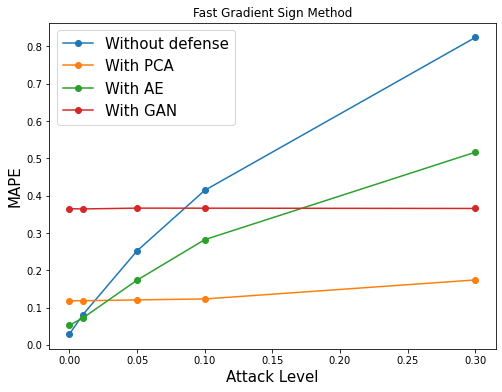

In [37]:
plt.figure(figsize=(8,6))
plt.plot(levels, MAPE_FGSM, label="Without defense",marker='o');
plt.plot(levels, MAPE_pca_FGSM, label="With PCA",marker='o');
plt.plot(levels, MAPE_ae_FGSM, label="With AE",marker='o');
plt.plot(levels, MAPE_GAN_FGSM, label="With GAN",marker='o');
plt.xlabel("Attack Level",fontsize=15);
plt.ylabel("MAPE",fontsize=15);
plt.legend(prop={'size': 15})
plt.title("Fast Gradient Sign Method")

G.save('Generator_EIA')